## Collecting Data Using Web Scraping

In [1]:
# this is url 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"



The data you need to scrape is the name of the programming language and average annual salary.
It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.

Import the required libraries


In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np



Download the webpage at the url

In [3]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

Create a soup object


In [4]:
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'



Scrape the Language name and annual average salary

In [5]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

## Save the scrapped data into a file named popular-languages.csv


In [6]:
# Get all rows from the table
language_list = []
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 3 as language_name
    salary = cols[3].getText() # store the value in column 4 as annual_average_salary
    language_list.append([language,salary])

In [7]:
# convert to dataframe:
df_lang = pd.DataFrame(language_list, columns=['Language','Average Annual Salary']) 

In [8]:
# save as csv:
filename = "popular-languages.csv"
df_lang.to_csv(filename)


In [9]:
# now print out the file:
df = pd.read_csv(filename, header=1) 
df

,0,Language,Average Annual Salary
0,1,Python,"$114,383"
1,2,Java,"$101,013"
2,3,R,"$92,037"
3,4,Javascript,"$110,981"
4,5,Swift,"$130,801"
5,6,C++,"$113,865"
6,7,C#,"$88,726"
7,8,PHP,"$84,727"
8,9,SQL,"$84,793"
9,10,Go,"$94,082"


In [10]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.6.2


In [11]:
#step 1 - clean data
df['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype(float)
df.sort_values('Average Annual Salary', ascending=True, inplace=True)
#del df['0']
df = df.set_index('Language')
df

,0,Average Annual Salary
Language,,
PHP,8,84727.0
SQL,9,84793.0
C#,7,88726.0
R,3,92037.0
Go,10,94082.0
Java,2,101013.0
Javascript,4,110981.0
C++,6,113865.0
Python,1,114383.0


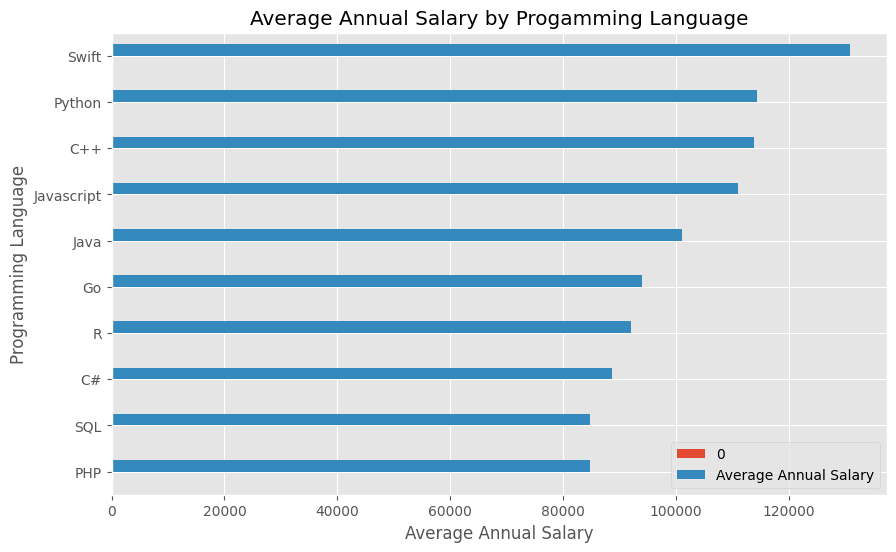

In [12]:
# step 2: plot data
df.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Programming Language') # add y-label to the plot
plt.title('Average Annual Salary by Progamming Language') # add title to the plot

plt.show()

In [13]:
df.shape

(10, 2)